<a href="https://colab.research.google.com/github/mingshey/python_wave/blob/main/Wave2d_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2차원 파동 방정식 유도

2차원 파동 방정식은 탄성 매질에서의 파동 운동이나 전자기파의 전파 등 다양한 물리적 현상에서 유도될 수 있습니다. 여기서는 간단하게 얇은 막에서의 운동 방정식을 통해 유도하는 아이디어를 설명합니다.

얇은 막의 미소 면적 요소 $\Delta x \Delta y$를 고려해 봅시다. 이 막이 미세하게 변위되어 있을 때, 변위 $u(x, y, t)$는 시간 $t$와 공간 좌표 $(x, y)$의 함수입니다. 막에 작용하는 힘은 주로 장력에 의해 발생합니다.

막의 각 점에서 장력은 막 표면에 접선 방향으로 작용합니다. 미소 면적 요소의 네 변에 작용하는 장력을 고려하고, 변위가 작다는 가정 하에 장력의 수직 성분을 계산합니다.

예를 들어, $x$ 방향으로의 변위를 고려하면, 막의 기울기는 $\frac{\partial u}{\partial x}$로 근사할 수 있습니다. 장력 $T$가 작용할 때, $x$ 방향의 양 끝에서의 수직 성분 힘의 차이는 다음과 같이 근사됩니다.

$$ T \frac{\partial u}{\partial x}\bigg|_{x+\Delta x} \Delta y - T \frac{\partial u}{\partial x}\bigg|_{x} \Delta y \approx T \frac{\partial^2 u}{\partial x^2} \Delta x \Delta y $$

마찬가지로 $y$ 방향으로의 수직 성분 힘의 차이는 다음과 같습니다.

$$ T \frac{\partial u}{\partial y}\bigg|_{y+\Delta y} \Delta x - T \frac{\partial u}{\partial y}\bigg|_{y} \Delta x \approx T \frac{\partial^2 u}{\partial y^2} \Delta x \Delta y $$

미소 면적 요소에 작용하는 알짜 수직 힘은 이 두 성분의 합입니다. 뉴턴의 제2법칙 $F=ma$를 적용하면, 질량 밀도 $\rho$를 갖는 막의 미소 질량은 $\rho \Delta x \Delta y$이고 가속도는 $\frac{\partial^2 u}{\partial t^2}$이므로 다음과 같은 운동 방정식을 얻습니다.

$$ T \frac{\partial^2 u}{\partial x^2} \Delta x \Delta y + T \frac{\partial^2 u}{\partial y^2} \Delta x \Delta y = (\rho \Delta x \Delta y) \frac{\partial^2 u}{\partial t^2} $$

양변을 $\Delta x \Delta y$로 나누고, $c^2 = T/\rho$ (파동의 속력의 제곱)으로 정의하면 최종적으로 2차원 파동 방정식을 얻습니다.

$$ \frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) $$

이는 변위 $u$가 시간과 공간에 따라 어떻게 변화하는지를 나타내는 핵심적인 방정식입니다. 다음 섹션에서는 이 파동 방정식을 수치적으로 풀기 위한 유한 차분법에 대해 설명합니다.

## 유한 차분 근사

단순한 이차원 파동 방정식은 다음과 같은 편미분 방정식 형태로 주어집니다.

$$ \frac{\partial^2 u}{\partial t ^2} = c^2\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)$$

이것을 유한한 간격의 차분 방정식으로 변환하면 다음과 같습니다. 시간과 공간에 대한 2차 미분항을 중앙 차분으로 근사합니다.

시간에 대한 2차 미분:
$$ \frac{u(x, y, t+\Delta t) - 2u(x, y, t) + u(x, y, t-\Delta t)}{(\Delta t)^2} $$

공간에 대한 2차 미분 (x 방향):
$$ \frac{u(x+\Delta x, y, t) - 2u(x, y, t) + u(x-\Delta x, y, t)}{(\Delta x)^2} $$

공간에 대한 2차 미분 (y 방향):
$$ \frac{u(x, y+\Delta y, t) - 2u(x, y, t) + u(x, y-\Delta y, t)}{(\Delta y)^2} $$

여기서 $h(=\Delta x =\Delta y)$ 를 공간 격자 간격으로, $\Delta t$를 시간 간격으로 설정하고 위 근사식을 원래 파동 방정식에 대입하면 다음과 같은 차분 방정식을 얻습니다.

$$ \frac{u(x, y, t+\Delta t) - 2u(x, y, t) + u(x, y, t-\Delta t)}{(\Delta t)^{2}} = c^{2}\left[ \frac{u(x+h, y, t) - 2u(x, y, t) + u(x-h, y, t)}{h ^2} + \frac{u(x, y+h, t) - 2u(x, y, t) + u(x, y-h, t)}{h ^2} \right]$$

위 식에서 시간 $t$에서의 값을 아래 첨자 $n$으로, $t-\Delta t$에서의 값을 $n-1$으로, $t+\Delta t$에서의 값을 $n+1$으로 표기하고, 미래의 값 $u(x, y)_{n+1}$에 대하여 정리하면 다음과 같습니다.

$$u(x, y)_{n+1} = 2u(x,y)_n - u(x,y)_{n-1} + \frac{c^2 \Delta t^2}{h^{2}}\left\{
u(x-h, y)_n + u(x+h, y)_n + u(x, y-h)_n + u(x, y+h)_n - 4 u(x, y)_n \right\}$$

$$u(x, y)_{n+1} = 2u(x,y)_n - u(x,y)_{n-1} + \left(\frac{c \Delta t}{h}\right)^2 \left\{
u(x-h, y)_n + u(x+h, y)_n + u(x, y-h)_n + u(x, y+h)_n - 4 u(x, y)_n \right\}$$

여기서 $\left(\frac{c \Delta t}{h}\right)^2$ 항은 파동의 속력, 시간 간격, 공간 간격에 의해 결정되는 중요한 값입니다. 이 식은 미래의 파동 값 $u(x, y)_{n+1}$이 현재 값 $u(x, y)_n$과 과거 값 $u(x, y)_{n-1}$, 그리고 현재 시점에서 주변 격자점들의 값에 의해 결정됨을 보여줍니다. 이는 시뮬레이션의 핵심적인 업데이트 규칙으로 사용됩니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.animation import PillowWriter
from scipy.ndimage import convolve, generate_binary_structure

주변 값과의 차이를 구하는 부분을 컨벌루션(convolution, 합성곱)을 이용하여 구한다.

컨벌루션을 위해 중심 값을 -4로 하고 주변(상하좌우) 값을 1로 하는 커널(kernel)을 정의해준다

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


(np.float64(-0.5), np.float64(2.5), np.float64(2.5), np.float64(-0.5))

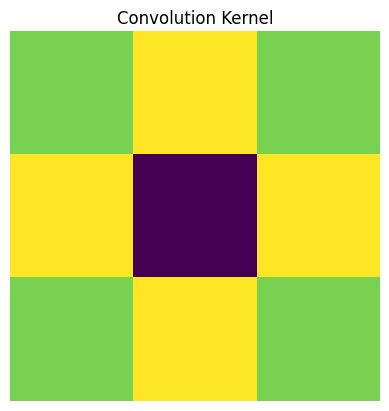

In [ ]:
kern = generate_binary_structure(2, 1).astype(float)
kern[1,1] = -4
print(kern)
plt.imshow(kern)
plt.title("Convolution Kernel")
plt.axis('off') # Turn off axis for better visualization of the kernel

## 파동 스텝 함수 정의 (define wave step function)


In [ ]:
def wavestep(past, curr, rsq, rows, cols, tval):
  '''
  2D wave simulation by finite element method.
  Takes past and current(curr) state of mesh sizee rows by cols
  and returns the state one step into the future(fut).
  rsq is the medium characteristics, i.e. (wave speed * dt/dx)^2.
  tval is the current time value: used to give time-dependent forced oscillation
  '''
  global kern, dt
  # 파동 방정식을 이용하여 다음 시간 단계의 값을 계산합니다.
  # fut = 2 * curr - past + convolve(rsq * curr, kern)는 차분 방정식을 코드로 구현한 것입니다.
  # past: 이전 시간 단계의 격자 값
  # curr: 현재 시간 단계의 격자 값
  # rsq: (c*dt/dx)^2 값 (매질 특성 및 시간/공간 간격 관련)
  # kern: 컨볼루션 커널
  # for i in range(1, cols-1):
  #   for j in range(1, rows-1):
  #     fut[i,j] = 2 * curr[i,j] - past[i,j] + rsq * (curr[i-1,j] + curr[i+1,j] + curr[i, j-1] + curr[i, j+1] - 4*curr[i,j])

  fut = 2 * curr - past + convolve(rsq * curr, kern)

  # 다음 시간 단계의 격자 값(fut), 현재 격자 값(curr), 갱신된 시간(tval + dt)을 반환합니다.
  return ([curr, fut, tval + dt])

## 초기 조건 설정 (set initial conditions)

In [ ]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
rs = 128                       # number of rows (행의 수)
cs = 128                       # number of columns (열의 수)
speed = 5.0                    # medium interaction speed (파동 속력)
dt = 0.0001                    # time step (시간 간격)
dx = 0.01                      # mesh grid size (격자 간격)
cspeed = dx/dt                 # characteristic speed dx/dt (특성 속력)
r = speed / cspeed             # mesh interaction rate (격자 상호작용 비율)

# Inititalize Wave field
pm = np.zeros((rs, cs))   # past mesh matrix (이전 시간 단계 격자)
cm = np.zeros((rs, cs))   # current mesh matrix (현재 시간 단계 격자)

#점파원: 펄스 (작은 정사각형 영역의 초기값을 주변과 다른 값으로 준다)
# 격자 중앙에 초기 파원(펄스 형태)을 설정합니다.
pm[rs//2-2:rs//2+2, cs//2-2:cs//2+2] = cm[rs//2-2:rs//2+2, cs//2-2:cs//2+2] = 50
"""
  (0,0)                 (0,cs-1)
  +---------------------+
  |                     |
  |                     |
  |                     |
  |          o          |
  |        파원          |
  |                     |
  |                     |
  +---------------------+
  (rs-1,0)              (rs-1, cs-1)
"""

msq = r**2 # r의 제곱 값을 계산합니다.

t = 0.0                        # initial time value (초기 시간)
cm[rs//2:rs//2+2, cs//10:cs//10+2] = 5.0
pm[rs//2:rs//2+2, cs//10:cs//10+2] = 5.0

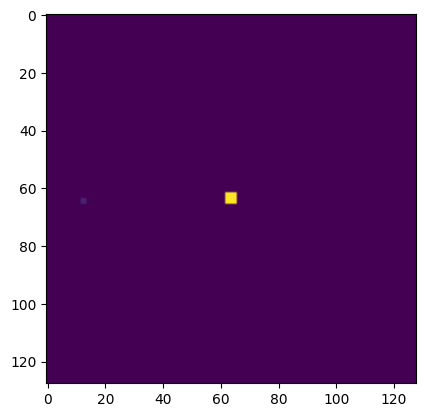

In [ ]:
plt.imshow(cm)

## 시뮬레이션 실행 및 스냅샷 저장 (run simulation and save snapshots)


In [ ]:
# Run simulation (시뮬레이션 실행)
advance = 20  # 스냅샷 사이에 진행할 시간 단계 수
N=2500        # 총 시뮬레이션 시간 단계 수
n=N//advance  # 저장할 스냅샷의 총 개수

maps = np.empty((0, rs, cs)) # 각 시간 단계의 격자 상태를 저장할 배열
ts = np.array([])            # 각 스냅샷의 시간을 저장할 배열

# 시뮬레이션을 실행하고 스냅샷을 저장합니다.
for k in range(n):
  for i in range(advance):    # advance 횟수만큼 시간 단계를 진행합니다.
    pm, cm, t = wavestep(pm, cm, msq, rs, cs, t) # wavestep 함수를 호출하여 다음 시간 단계 계산
  maps = np.append(maps, [cm], axis=0) # 현재 격자 상태를 maps 배열에 추가
  ts = np.append(ts,[t]) # 현재 시간을 ts 배열에 추가

## 시각화 함수 정의 및 테스트 (define and test visualization function)

**Reasoning**:
The previous command failed because `row_sample` was not defined before being used in the `frame` function. Define `row_sample` before calling `frame(10)`.



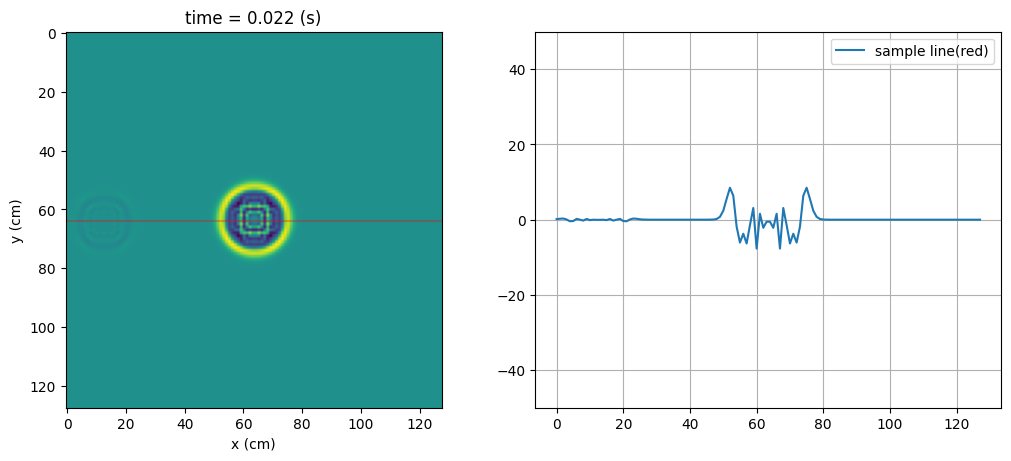

In [ ]:
row_sample = rs // 2

def frame(i):
  # 애니메이션의 각 프레임을 생성하는 함수
  ax[0].cla() # 첫 번째 서브플롯(2D 파동 이미지) 초기화
  plt.subplot(121) # 1행 2열 중 첫 번째 서브플롯 선택
  ax[0].imshow(maps[i], vmin=-10, vmax=10)  # i번째 스냅샷의 2D 파동 이미지를 표시합니다. 색상 범위를 -10에서 10으로 설정합니다.
#  ax[0].contour(mm, [r/2], colors="white") # 매질 특성을 등고선으로 표시하는 코드 (현재 주석 처리됨)
  ax[0].axhline(row_sample, color='red', alpha=0.3) # 샘플링하는 행(row_sample)에 빨간색 수평선을 표시합니다.
  ax[0].set_xlabel("x (cm)")   # x축 라벨 설정
  ax[0].set_ylabel("y (cm)")   # y축 라벨 설정
  ax[0].set_title(f"time = {ts[i]:.3g} (s)")   # 현재 시간 값을 제목으로 표시합니다.
  plt.subplot(122) # 1행 2열 중 두 번째 서브플롯 선택
  ax[1].cla() # 두 번째 서브플롯(파동 단면 그래프) 초기화
  ax[1].grid() # 그리드 표시
  ax[1].set_ylim([-50,50]) # y축 범위 설정
  ax[1].plot(maps[i, row_sample, :], label='sample line(red)') # 샘플링된 행의 파동 값을 그래프로 표시합니다.
#  ax[1].plot(mm[row_sample, :]/r*10, c='gray', label='wave speed') # 매질 특성을 그래프로 표시하는 코드 (현재 주석 처리됨)
  ax[1].legend() # 범례 표시

fig, ax = plt.subplots(1,2,figsize=(10,4.5), constrained_layout=True)
# 1행 2열의 서브플롯을 갖는 figure와 axes 객체를 생성합니다.
# figsize는 그림의 크기를, constrained_layout은 레이아웃을 자동으로 조정합니다.
frame(10) # 10번째 스냅샷을 사용하여 초기 프레임을 표시합니다.

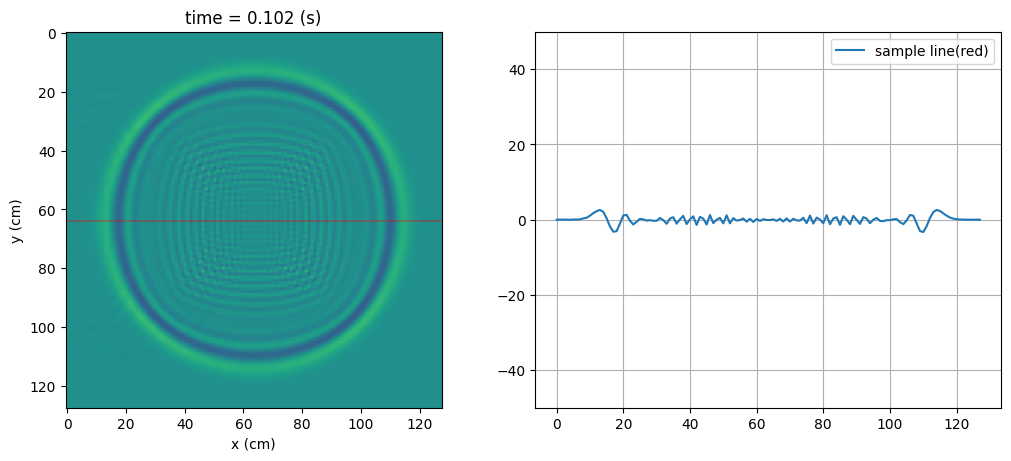

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4.5), constrained_layout=True)
frame(50)

## 애니메이션 생성 및 저장 (create and save animation)


In [ ]:
simname = 'Wave2d-Basics'

# 시뮬레이션 결과 파일의 이름을 정의합니다.

ani = anim.FuncAnimation(fig, frame, frames=n)

# matplotlib의 FuncAnimation을 사용하여 애니메이션 객체를 생성합니다.
# fig: 애니메이션을 표시할 figure 객체
# frame: 각 프레임을 그리는 함수
# frames=n: 애니메이션에 사용할 총 프레임 수 (저장된 스냅샷 수)

ani.save(simname + '.gif', writer = 'pillow', fps = 20)

# 생성된 애니메이션을 GIF 파일로 저장합니다.
# simname + '.gif': 저장될 파일 이름
# writer='pillow': GIF 저장을 위한 writer 설정
# fps=20: 초당 프레임 수 설정

ani.save(simname + '.avi', dpi = 150, fps = 20)

# 생성된 애니메이션을 AVI 파일로 저장합니다.
# simname + '.avi': 저장될 파일 이름
# dpi=150: 해상도 설정
# fps=20: 초당 프레임 수 설정